In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_excel('/kaggle/input/amazon-sales-dataset/Amazon 2_Raw.xlsx')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [27]:
df.head(5)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [28]:
#check if data has any duplicates
df.duplicated().sum()

0

In [29]:
#checking nulls
df.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [30]:
#creating new column - Year
df['Year'] = df['Order Date'].dt.year

In [31]:
#Group profit by years
df.groupby('Year')['Profit'].sum().round()

Year
2011    20066.0
2012    20492.0
2013    23960.0
2014    43901.0
Name: Profit, dtype: float64

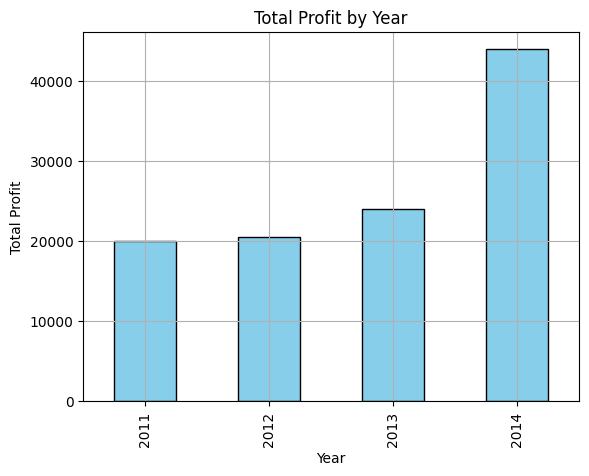

In [32]:
#visualisation profit by years
profit_by_year = df.groupby('Year')['Profit'].sum()
profit_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [33]:
#group sales by year
sales_by_year = df.groupby('Year')['Sales'].sum().round()
print(sales_by_year)

Year
2011    147883.0
2012    139966.0
2013    186976.0
2014    250633.0
Name: Sales, dtype: float64


In [ ]:
#visualisation sales by year
sales_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
#creating column extracting states only
df['State'] = df['Geography'].apply(lambda x: x.split(',')[-1])

In [ ]:
#sales by states
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending = False)
print(sales_by_state)

In [ ]:
#visualisation sales by states
sales_by_state.plot(kind='bar' )
plt.title('Sales Distribution by State')
plt.show()

In [ ]:
#Profit by Category and Year
profit_by_category_year = df.groupby(['Category', 'Year'])['Profit'].sum()
print(profit_by_category_year)

In [ ]:
#Profit by Category and Year (Pivoted)
pivot_profit_by_category_year = profit_by_category_year.unstack()
print(pivot_profit_by_category_year)

In [ ]:
#creating heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_profit_by_category_year, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Profit by Category and Year')
plt.xlabel('Year')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 customer emails
top_10_customers = df.groupby('EmailID')['Sales'].sum().sort_values(ascending = False).head(10)
print(top_10_customers)